In [2]:
%matplotlib inline

In [4]:
import pandas as pd

In [44]:
# read in public form data
data = pd.read_excel('../data/pydata_data.xlsx')

In [45]:
# organizer list - not available in public form data
org = data.filter(regex='Your name |Your email ').dropna()
org.columns = ['name', 'email']

In [37]:
# types of events level of interest
events = data.filter(regex='What types of')
# process for clarity
events.columns = [c.split('[')[1].strip(']') for c in events.columns]
# topics
topics = data['What PyData-related topics are you most interested in?']

In [38]:
# get interest count by type
interest = events.apply(lambda x: x.value_counts()).T
interest = interest[['Not interested', 'Interested', 'Very interested']]
# get total votes
total = interest.sum(axis=1)
# weighted vote average
w_interest = (interest * [0, 1, 2]).sum(axis=1)/total
# if we weight any interest
w_any_interest = (interest * [0, 1, 1]).sum(axis=1)/total

Text(0.5, 1.0, 'Weighted average of event interest')

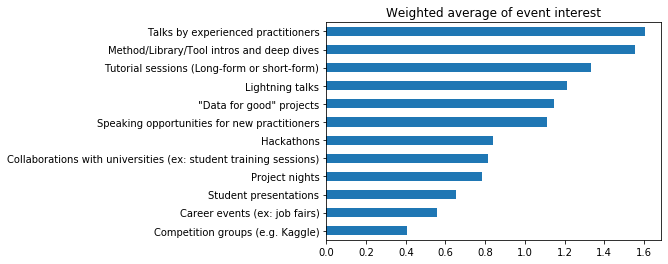

In [39]:
p = w_interest.sort_values().plot(kind='barh')
p.set_title('Weighted average of event interest')

Text(0.5, 1.0, '% of respondents marking an event as interesting')

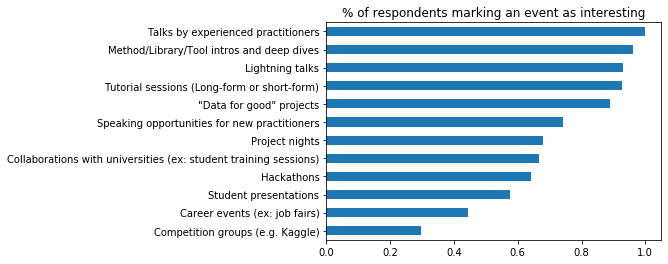

In [40]:
p = w_any_interest.sort_values().plot(kind='barh')
p.set_title('% of respondents marking an event as interesting')

In [41]:
from collections import Counter

In [42]:
count_topics = Counter(
    [item.strip() for sublist in topics.str.split(', ') for item in sublist])

Text(0.5, 1.0, 'Count of respondents interested in a topic')

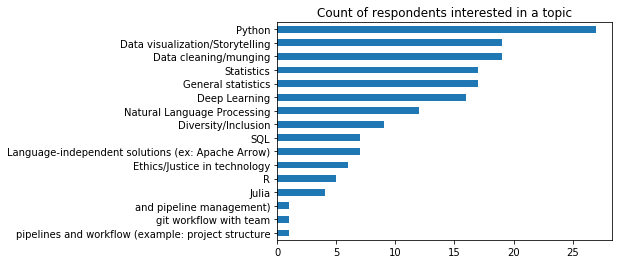

In [43]:
p = pd.Series(count_topics).sort_values().plot(kind='barh')
p.set_title('Count of respondents interested in a topic')